# Vanilla LSTM Forescating model

Based on:
* [Time Series Forecasting on Stock Prices](https://www.youtube.com/watch?v=j05UUs99eNQ) from [Coding Tech](https://www.youtube.com/channel/UCtxCXg-UvSnTKPOzLH4wJaQ)
* https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

Import the libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import matplotlib.pyplot as plt

Split an univariate sequence into samples

In [2]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # Find the end of the pattern
        end_ix = i + n_steps
        # Check if we are bound by sequence
        if end_ix > len(sequence) - 1:
            break
        # Gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

Load the data

In [3]:
df = pd.read_csv("SP500.csv")

Show the data

In [4]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-05-19,96.106028,96.106028,94.484962,94.779701,775500,0.0,0
1,2000-05-22,94.716551,94.716551,92.169162,94.190231,1850600,0.0,0
2,2000-05-23,94.463952,94.463952,92.758675,92.758675,373900,0.0,0
3,2000-05-24,92.800753,94.358660,92.063905,94.148132,400300,0.0,0
4,2000-05-25,94.337613,94.948145,92.884970,93.284973,69600,0.0,0
...,...,...,...,...,...,...,...,...
5359,2021-09-08,452.899994,453.679993,450.869995,453.000000,4076800,0.0,0
5360,2021-09-09,452.690002,454.579987,450.730011,450.980011,3851600,0.0,0
5361,2021-09-10,453.059998,453.510010,447.299988,447.540009,3023500,0.0,0
5362,2021-09-13,450.679993,450.929993,446.089996,448.579987,3007400,0.0,0


Add indices for every day in the period

In [5]:
start_date = df.Date.min()
end_date = df.Date.max()

In [6]:
df_date = pd.date_range(start=start_date, end=end_date).to_frame(name="Date")
df_date.reset_index(drop=True, inplace=True) 

In [7]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.merge(df_date, how='right')

Interpolate missing values

In [8]:
df = df.interpolate(method='linear', limit_direction='both')
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-05-19,96.106028,96.106028,94.484962,94.779701,7.755000e+05,0.0,0.0
1,2000-05-20,95.642869,95.642869,93.713029,94.583211,1.133867e+06,0.0,0.0
2,2000-05-21,95.179710,95.179710,92.941096,94.386721,1.492233e+06,0.0,0.0
3,2000-05-22,94.716551,94.716551,92.169162,94.190231,1.850600e+06,0.0,0.0
4,2000-05-23,94.463952,94.463952,92.758675,92.758675,3.739000e+05,0.0,0.0
...,...,...,...,...,...,...,...,...
7784,2021-09-10,453.059998,453.510010,447.299988,447.540009,3.023500e+06,0.0,0.0
7785,2021-09-11,452.266663,452.650004,446.896657,447.886668,3.018133e+06,0.0,0.0
7786,2021-09-12,451.473328,451.789998,446.493327,448.233327,3.012767e+06,0.0,0.0
7787,2021-09-13,450.679993,450.929993,446.089996,448.579987,3.007400e+06,0.0,0.0


Define input sequence

In [9]:
raw_seq = np.array(df.Close)

Choose a number of time steps

In [10]:
n_steps = 10
n_features = 1

Split into samples

In [11]:
X, y = split_sequence(raw_seq, n_steps)

Set test data

In [12]:
test_size = n_steps
prediction_size = n_features
y_test = y[-test_size-prediction_size:-prediction_size]
X_test = raw_seq[-test_size-prediction_size:-prediction_size]
X_test = X_test.reshape((1, test_size, n_features))

In [13]:
y_expected = y[-prediction_size:]

In [14]:
y = y[:-test_size-prediction_size]
X = X[:-test_size-prediction_size]

Reshape from [samples, timesteps] into [samples, timesteps, features]

In [15]:
X = X.reshape((X.shape[0], X.shape[1], n_features))

Define model

In [16]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))

In [17]:
model.compile(optimizer='adam', loss='mse')

Fit model

In [18]:
model.fit(X, y, epochs=200)

Epoch 1/200
243/243 [==============================] - 1s 3ms/step - loss: 470.1383
Epoch 2/200
243/243 [==============================] - 1s 3ms/step - loss: 21.6507
Epoch 3/200
243/243 [==============================] - 1s 3ms/step - loss: 12.0375
Epoch 4/200
243/243 [==============================] - 1s 3ms/step - loss: 11.6350
Epoch 5/200
243/243 [==============================] - 1s 3ms/step - loss: 11.2935
Epoch 6/200
243/243 [==============================] - 1s 3ms/step - loss: 11.3744
Epoch 7/200
243/243 [==============================] - 1s 3ms/step - loss: 11.3624
Epoch 8/200
243/243 [==============================] - 1s 3ms/step - loss: 9.7750
Epoch 9/200
243/243 [==============================] - 1s 3ms/step - loss: 8.5773
Epoch 10/200
243/243 [==============================] - 1s 3ms/step - loss: 7.0974
Epoch 11/200
243/243 [==============================] - 1s 3ms/step - loss: 7.7697
Epoch 12/200
243/243 [==============================] - 1s 3ms/step - loss: 8.2126
Epoch

243/243 [==============================] - 1s 3ms/step - loss: 2.5969
Epoch 197/200
243/243 [==============================] - 1s 3ms/step - loss: 2.6656
Epoch 198/200
243/243 [==============================] - 1s 3ms/step - loss: 2.6408
Epoch 199/200
243/243 [==============================] - 1s 3ms/step - loss: 2.4515
Epoch 200/200
243/243 [==============================] - 1s 3ms/step - loss: 2.5701


Demonstrate training

In [19]:
yhat = model.predict(X)

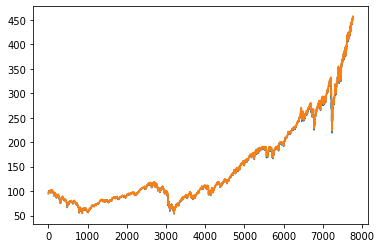

In [20]:
plt.plot(y)
plt.plot(yhat)
plt.show()

Demonstrate prediction

In [21]:
yhat = model.predict(X_test)

In [22]:
print(f"Predicted: {yhat[0][0]:.2f}  Expected: {y_expected[0]:.2f}")

Predicted: 449.73  Expected: 446.19


**THIS IS NOT AN INVESTMENT ADVICE!**